In [1]:
import funciones_nba_models
from funciones_nba_models import *

df = pd.read_csv('DataFrameForModel_0.1.csv')
df['Prob_W']= (df['Times_W']+0.5) / (df['Times_W']+df['Times_L']+1)
df['Prob_L']= 1 - df['Prob_W']
df['Result']=df['Result'].apply(lambda x: 'W' if 'W' in str(x) else 'L')

In [2]:
X = df._get_numeric_data()
y = df['Result']
y = pd.get_dummies(y, drop_first=True, dtype=int, columns=['Result'])

prob_inicial_W = df['Prob_W']
prob_inicial_L = df['Prob_L']

### BAYES NAIVE

In [3]:
accuracy_bayes = NaiveBayes(X, y, df)
accuracy_bayes

0.44

### GAUSSIAN NB

In [4]:
d_acc = {}
for i in range(3):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    gnb_acc_test, gnb_acc_train = GNB(Xtrain, Xtest, ytrain, ytest)
    d_acc[i]=[gnb_acc_test, gnb_acc_train]

In [5]:
d_acc

{0: [0.39, 0.4477266145380828],
 1: [0.48, 0.4425137561540689],
 2: [0.41, 0.4465682015638575]}

### LOGISTIC REGRESSION

In [6]:
d_acc = {}
for i in range(3):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    logr_acc_test, logr_acc_train = LogicRegression(Xtrain, Xtest, ytrain, ytest)
    d_acc[i]=[logr_acc_test, logr_acc_train]

In [7]:
d_acc

{0: [0.385, 0.4468578048074138],
 1: [0.48, 0.4413553431798436],
 2: [0.415, 0.4451201853460759]}

Parece que la performance de estos modelos no dan un buen resultado, esto puede deberser a la complejidad del Data Frame trás la creación de nuevas variables en la fase de EDA.

### XGBOOST

In [8]:
d_acc = {}
for i in range(3):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    xgb_acc_test, xgb_acc_train = XGB(Xtrain, Xtest, ytrain, ytest)
    d_acc[i]=[xgb_acc_test, xgb_acc_train]

In [9]:
d_acc

{0: [0.68, 0.6675354763973357],
 1: [0.66, 0.66956269910223],
 2: [0.655, 0.6692730958586737]}

### RANDOM FOREST

In [10]:
d = {}
for i in range(3):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    rf_acc_test, rf_acc_train = RandomForest(Xtrain, Xtest, ytrain, ytest)
    d_acc[i]=[rf_acc_test, rf_acc_train]

In [11]:
d_acc

{0: [0.615, 0.5531421951925861],
 1: [0.52, 0.5586446568201564],
 2: [0.585, 0.5548798146539241]}

### CAT BOOST

In [12]:
d_acc = {}
for i in range(3):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)    
    cb_acc_test, cb_acc_train = CatBoost(Xtrain, Xtest, ytrain, ytest)
    d_acc[i]=[cb_acc_test, cb_acc_train]

0:	learn: 0.6925843	total: 60.1ms	remaining: 5.95s
1:	learn: 0.6920234	total: 62ms	remaining: 3.04s
2:	learn: 0.6914281	total: 63.9ms	remaining: 2.06s
3:	learn: 0.6908300	total: 65.6ms	remaining: 1.57s
4:	learn: 0.6900076	total: 67.3ms	remaining: 1.28s
5:	learn: 0.6894244	total: 69ms	remaining: 1.08s
6:	learn: 0.6888439	total: 70.6ms	remaining: 939ms
7:	learn: 0.6882484	total: 72.3ms	remaining: 831ms
8:	learn: 0.6876612	total: 73.8ms	remaining: 746ms
9:	learn: 0.6872101	total: 75.4ms	remaining: 678ms
10:	learn: 0.6865938	total: 77ms	remaining: 623ms
11:	learn: 0.6860059	total: 78.6ms	remaining: 576ms
12:	learn: 0.6855766	total: 80.7ms	remaining: 540ms
13:	learn: 0.6851027	total: 82.1ms	remaining: 504ms
14:	learn: 0.6845412	total: 83.6ms	remaining: 474ms
15:	learn: 0.6840788	total: 85.1ms	remaining: 447ms
16:	learn: 0.6836629	total: 86.6ms	remaining: 423ms
17:	learn: 0.6832423	total: 88.2ms	remaining: 402ms
18:	learn: 0.6826996	total: 89.7ms	remaining: 382ms
19:	learn: 0.6822276	total: 

33:	learn: 0.6738590	total: 55.8ms	remaining: 108ms
34:	learn: 0.6733058	total: 57.3ms	remaining: 106ms
35:	learn: 0.6727655	total: 58.9ms	remaining: 105ms
36:	learn: 0.6722369	total: 60.4ms	remaining: 103ms
37:	learn: 0.6716669	total: 62.1ms	remaining: 101ms
38:	learn: 0.6711999	total: 63.6ms	remaining: 99.5ms
39:	learn: 0.6706490	total: 64.9ms	remaining: 97.4ms
40:	learn: 0.6703548	total: 67.1ms	remaining: 96.5ms
41:	learn: 0.6698937	total: 68.7ms	remaining: 94.8ms
42:	learn: 0.6695041	total: 70.3ms	remaining: 93.2ms
43:	learn: 0.6690195	total: 73.3ms	remaining: 93.3ms
44:	learn: 0.6684474	total: 76.5ms	remaining: 93.5ms
45:	learn: 0.6679972	total: 78.9ms	remaining: 92.6ms
46:	learn: 0.6676060	total: 80.7ms	remaining: 91ms
47:	learn: 0.6671503	total: 82.3ms	remaining: 89.1ms
48:	learn: 0.6667320	total: 83.9ms	remaining: 87.3ms
49:	learn: 0.6662652	total: 85.5ms	remaining: 85.5ms
50:	learn: 0.6657114	total: 86.9ms	remaining: 83.5ms
51:	learn: 0.6652763	total: 88.3ms	remaining: 81.5ms


56:	learn: 0.6598355	total: 87.2ms	remaining: 65.8ms
57:	learn: 0.6591868	total: 88.9ms	remaining: 64.4ms
58:	learn: 0.6586908	total: 90.6ms	remaining: 62.9ms
59:	learn: 0.6582470	total: 93.1ms	remaining: 62.1ms
60:	learn: 0.6578379	total: 94.7ms	remaining: 60.5ms
61:	learn: 0.6574487	total: 96.3ms	remaining: 59ms
62:	learn: 0.6569796	total: 97.9ms	remaining: 57.5ms
63:	learn: 0.6565509	total: 99.5ms	remaining: 55.9ms
64:	learn: 0.6561434	total: 101ms	remaining: 54.4ms
65:	learn: 0.6557041	total: 102ms	remaining: 52.8ms
66:	learn: 0.6553574	total: 104ms	remaining: 51.3ms
67:	learn: 0.6549045	total: 106ms	remaining: 49.7ms
68:	learn: 0.6546127	total: 107ms	remaining: 48.2ms
69:	learn: 0.6542783	total: 109ms	remaining: 46.6ms
70:	learn: 0.6539416	total: 110ms	remaining: 45ms
71:	learn: 0.6535390	total: 112ms	remaining: 43.4ms
72:	learn: 0.6530325	total: 113ms	remaining: 41.8ms
73:	learn: 0.6527409	total: 114ms	remaining: 40.2ms
74:	learn: 0.6522344	total: 116ms	remaining: 38.6ms
75:	lear

90:	learn: 0.6542196	total: 144ms	remaining: 14.2ms
91:	learn: 0.6538632	total: 145ms	remaining: 12.7ms
92:	learn: 0.6535774	total: 147ms	remaining: 11.1ms
93:	learn: 0.6532194	total: 148ms	remaining: 9.47ms
94:	learn: 0.6529031	total: 150ms	remaining: 7.89ms
95:	learn: 0.6525825	total: 151ms	remaining: 6.31ms
96:	learn: 0.6523049	total: 153ms	remaining: 4.73ms
97:	learn: 0.6520800	total: 155ms	remaining: 3.16ms
98:	learn: 0.6517134	total: 156ms	remaining: 1.58ms
99:	learn: 0.6515160	total: 158ms	remaining: 0us
0:	learn: 0.6924993	total: 1.84ms	remaining: 182ms
1:	learn: 0.6919176	total: 3.58ms	remaining: 176ms
2:	learn: 0.6913403	total: 5.45ms	remaining: 176ms
3:	learn: 0.6908040	total: 7.23ms	remaining: 174ms
4:	learn: 0.6900912	total: 9.72ms	remaining: 185ms
5:	learn: 0.6894244	total: 11.5ms	remaining: 180ms
6:	learn: 0.6889547	total: 13.8ms	remaining: 184ms
7:	learn: 0.6883853	total: 15.6ms	remaining: 179ms
8:	learn: 0.6877574	total: 17.2ms	remaining: 174ms
9:	learn: 0.6871637	tota

0:	learn: 0.6923999	total: 1.55ms	remaining: 153ms
1:	learn: 0.6916602	total: 3.05ms	remaining: 149ms
2:	learn: 0.6909089	total: 4.74ms	remaining: 153ms
3:	learn: 0.6902860	total: 6.17ms	remaining: 148ms
4:	learn: 0.6895959	total: 7.84ms	remaining: 149ms
5:	learn: 0.6887591	total: 9.45ms	remaining: 148ms
6:	learn: 0.6881102	total: 10.9ms	remaining: 145ms
7:	learn: 0.6874888	total: 12.4ms	remaining: 143ms
8:	learn: 0.6869284	total: 13.9ms	remaining: 140ms
9:	learn: 0.6863692	total: 15.4ms	remaining: 139ms
10:	learn: 0.6857189	total: 16.9ms	remaining: 137ms
11:	learn: 0.6850649	total: 18.5ms	remaining: 136ms
12:	learn: 0.6845762	total: 20.1ms	remaining: 134ms
13:	learn: 0.6838276	total: 21.6ms	remaining: 133ms
14:	learn: 0.6830838	total: 23.1ms	remaining: 131ms
15:	learn: 0.6825071	total: 24.6ms	remaining: 129ms
16:	learn: 0.6820836	total: 26.1ms	remaining: 127ms
17:	learn: 0.6814000	total: 27.6ms	remaining: 126ms
18:	learn: 0.6808736	total: 29.1ms	remaining: 124ms
19:	learn: 0.6803353	t

22:	learn: 0.6796915	total: 55.9ms	remaining: 187ms
23:	learn: 0.6791898	total: 58.5ms	remaining: 185ms
24:	learn: 0.6788206	total: 62ms	remaining: 186ms
25:	learn: 0.6784071	total: 64.7ms	remaining: 184ms
26:	learn: 0.6780142	total: 68.7ms	remaining: 186ms
27:	learn: 0.6775607	total: 72ms	remaining: 185ms
28:	learn: 0.6770237	total: 75.7ms	remaining: 185ms
29:	learn: 0.6766493	total: 78.4ms	remaining: 183ms
30:	learn: 0.6761082	total: 80.9ms	remaining: 180ms
31:	learn: 0.6756427	total: 83.2ms	remaining: 177ms
32:	learn: 0.6750887	total: 85.5ms	remaining: 174ms
33:	learn: 0.6745743	total: 87.8ms	remaining: 170ms
34:	learn: 0.6740734	total: 89.9ms	remaining: 167ms
35:	learn: 0.6736916	total: 92.8ms	remaining: 165ms
36:	learn: 0.6733099	total: 95ms	remaining: 162ms
37:	learn: 0.6728511	total: 97.4ms	remaining: 159ms
38:	learn: 0.6724366	total: 100ms	remaining: 157ms
39:	learn: 0.6720037	total: 103ms	remaining: 154ms
40:	learn: 0.6714469	total: 105ms	remaining: 151ms
41:	learn: 0.6710477	

In [13]:
d_acc

{0: [0.64, 0.649290472053287],
 1: [0.645, 0.6504488850275123],
 2: [0.655, 0.6507384882710686]}

### NEURAL NETWORK

In [14]:
d_acc = {}
for i in range(3):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    nn_acc_test, nn_acc_train = NeuralNet(Xtrain, Xtest, ytrain, ytest)
    d_acc[i]=[nn_acc_test, nn_acc_train]

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [15]:
d_acc

{0: [0.64, 0.6322038806834637],
 1: [0.635, 0.6264118158123371],
 2: [0.6, 0.6692730958586737]}

Estos últimos modelos si han tenido una mejor performance superando todos el 0.6 de accuracy score.
Como podemos observar los modelos que mejor rendimiento han tenido fueron los Boosting y la Neural Network.

### VOTING  DE LOS 3 MEJORES MODELOS
Dado que tenemos tres modelos con puntajes de precisión bastante similares, hemos considerado utilizar un modelo de votación (Voting Classifier) para combinar las predicciones de estos modelos y obtener una predicción final.

In [16]:
d_acc = {}
for i in range(3):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    voting_test, voting_train, pred = voting_3bests(Xtrain, Xtest, ytrain, ytest)
    d_acc[i]=[voting_test, voting_train]

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 0.6925843	total: 1.48ms	remaining: 146ms
1:	learn: 0.6920234	total: 2.93ms	remaining: 144ms
2:	learn: 0.6914281	total: 4.32ms	remaining: 140ms
3:	learn: 0.6908300	total: 5.73ms	remaining: 137ms
4:	learn: 0.6900076	total: 7.1ms	remaining: 135ms
5:	learn: 0.6894244	total: 9.02ms	remaining: 141ms
6:	learn: 0.6888439	total: 10.7ms	remaining: 143ms
7:	learn: 0.6882484	total: 12.2ms	remaining: 140ms
8:	learn: 0.6876612	total: 13.8ms	remaining: 140ms
9:	learn: 0.6872101	total: 15.4ms	remaining: 138ms
10:	learn: 0.6865938	total: 17.5ms	remaining: 142ms
11:	learn: 0.6860059	total: 19.3ms	remaining: 141ms
12:	learn: 0.6855766	total: 21ms	remaining: 141ms
13:	learn: 0.6851027	total: 22.6ms	remaining: 139ms
14:	learn: 0.6845412	total: 24.5ms	remaining: 139ms
15:	learn: 0.6840788	total: 26ms	remaining: 136ms
16:	learn: 0.6836629	total: 27.4ms	remaining: 134ms
17:	learn: 

98:	learn: 0.6489838	total: 186ms	remaining: 1.88ms
99:	learn: 0.6486277	total: 189ms	remaining: 0us
0:	learn: 0.6924939	total: 2.67ms	remaining: 265ms
1:	learn: 0.6918093	total: 5.08ms	remaining: 249ms
2:	learn: 0.6911425	total: 7.81ms	remaining: 252ms
3:	learn: 0.6904468	total: 11.1ms	remaining: 266ms
4:	learn: 0.6897252	total: 13.4ms	remaining: 254ms
5:	learn: 0.6891922	total: 16.2ms	remaining: 254ms
6:	learn: 0.6887568	total: 18.1ms	remaining: 240ms
7:	learn: 0.6881762	total: 20.7ms	remaining: 238ms
8:	learn: 0.6877374	total: 22.5ms	remaining: 228ms
9:	learn: 0.6868457	total: 24.5ms	remaining: 221ms
10:	learn: 0.6862805	total: 26.5ms	remaining: 214ms
11:	learn: 0.6856899	total: 29.1ms	remaining: 213ms
12:	learn: 0.6850359	total: 30.9ms	remaining: 207ms
13:	learn: 0.6844665	total: 32.8ms	remaining: 201ms
14:	learn: 0.6838662	total: 35ms	remaining: 198ms
15:	learn: 0.6831880	total: 36.8ms	remaining: 193ms
16:	learn: 0.6825185	total: 38.7ms	remaining: 189ms
17:	learn: 0.6820209	total:

66:	learn: 0.6625939	total: 152ms	remaining: 74.9ms
67:	learn: 0.6623500	total: 154ms	remaining: 72.4ms
68:	learn: 0.6620386	total: 156ms	remaining: 69.9ms
69:	learn: 0.6618000	total: 157ms	remaining: 67.4ms
70:	learn: 0.6615111	total: 159ms	remaining: 65ms
71:	learn: 0.6611324	total: 161ms	remaining: 62.7ms
72:	learn: 0.6608279	total: 163ms	remaining: 60.3ms
73:	learn: 0.6605615	total: 165ms	remaining: 58ms
74:	learn: 0.6602294	total: 168ms	remaining: 56.1ms
75:	learn: 0.6598561	total: 171ms	remaining: 53.9ms
76:	learn: 0.6595645	total: 173ms	remaining: 51.6ms
77:	learn: 0.6593486	total: 175ms	remaining: 49.3ms
78:	learn: 0.6590026	total: 178ms	remaining: 47.2ms
79:	learn: 0.6587602	total: 180ms	remaining: 44.9ms
80:	learn: 0.6585081	total: 182ms	remaining: 42.6ms
81:	learn: 0.6582764	total: 184ms	remaining: 40.4ms
82:	learn: 0.6580070	total: 186ms	remaining: 38.1ms
83:	learn: 0.6577548	total: 189ms	remaining: 36ms
84:	learn: 0.6573850	total: 191ms	remaining: 33.7ms
85:	learn: 0.65717

0:	learn: 0.6925497	total: 1.69ms	remaining: 167ms
1:	learn: 0.6920447	total: 3.21ms	remaining: 157ms
2:	learn: 0.6913423	total: 4.88ms	remaining: 158ms
3:	learn: 0.6908310	total: 6.54ms	remaining: 157ms
4:	learn: 0.6900474	total: 8.49ms	remaining: 161ms
5:	learn: 0.6895057	total: 10.4ms	remaining: 163ms
6:	learn: 0.6890129	total: 12.5ms	remaining: 166ms
7:	learn: 0.6884741	total: 14.2ms	remaining: 164ms
8:	learn: 0.6879196	total: 16.2ms	remaining: 164ms
9:	learn: 0.6872905	total: 18ms	remaining: 162ms
10:	learn: 0.6868716	total: 19.7ms	remaining: 160ms
11:	learn: 0.6862289	total: 21.7ms	remaining: 159ms
12:	learn: 0.6856967	total: 23.2ms	remaining: 155ms
13:	learn: 0.6850430	total: 24.9ms	remaining: 153ms
14:	learn: 0.6845607	total: 26.6ms	remaining: 151ms
15:	learn: 0.6839920	total: 28.4ms	remaining: 149ms
16:	learn: 0.6835586	total: 30ms	remaining: 147ms
17:	learn: 0.6832280	total: 31.8ms	remaining: 145ms
18:	learn: 0.6827944	total: 33.3ms	remaining: 142ms
19:	learn: 0.6821455	total

32:	learn: 0.6755874	total: 56.2ms	remaining: 114ms
33:	learn: 0.6751082	total: 58.2ms	remaining: 113ms
34:	learn: 0.6746048	total: 60.1ms	remaining: 112ms
35:	learn: 0.6741864	total: 62ms	remaining: 110ms
36:	learn: 0.6736314	total: 63.8ms	remaining: 109ms
37:	learn: 0.6732922	total: 65.5ms	remaining: 107ms
38:	learn: 0.6728949	total: 67.3ms	remaining: 105ms
39:	learn: 0.6725049	total: 69ms	remaining: 103ms
40:	learn: 0.6720981	total: 70.7ms	remaining: 102ms
41:	learn: 0.6717785	total: 72.5ms	remaining: 100ms
42:	learn: 0.6713653	total: 74.2ms	remaining: 98.4ms
43:	learn: 0.6709192	total: 76ms	remaining: 96.7ms
44:	learn: 0.6703904	total: 77.8ms	remaining: 95.1ms
45:	learn: 0.6699493	total: 79.5ms	remaining: 93.3ms
46:	learn: 0.6696072	total: 81.1ms	remaining: 91.5ms
47:	learn: 0.6691627	total: 83.3ms	remaining: 90.2ms
48:	learn: 0.6686784	total: 85ms	remaining: 88.5ms
49:	learn: 0.6682990	total: 87.4ms	remaining: 87.4ms
50:	learn: 0.6679426	total: 89ms	remaining: 85.5ms
51:	learn: 0.

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 0.6923969	total: 1.97ms	remaining: 195ms
1:	learn: 0.6918883	total: 4ms	remaining: 196ms
2:	learn: 0.6913134	total: 6.1ms	remaining: 197ms
3:	learn: 0.6907961	total: 7.91ms	remaining: 190ms
4:	learn: 0.6901863	total: 9.81ms	remaining: 186ms
5:	learn: 0.6896048	total: 11.8ms	remaining: 185ms
6:	learn: 0.6891557	total: 13.6ms	remaining: 181ms
7:	learn: 0.6886004	total: 15.5ms	remaining: 178ms
8:	learn: 0.6878571	total: 17.4ms	remaining: 176ms
9:	learn: 0.6873552	total: 19.1ms	remaining: 172ms
10:	learn: 0.6867833	total: 20.7ms	remaining: 168ms
11:	learn: 0.6860226	total: 22.5ms	remaining: 165ms
12:	learn: 0.6852799	total: 24.2ms	remaining: 162ms
13:	learn: 0.6847062	total: 26ms	remaining: 160ms
14:	learn: 0.6839451	total: 28ms	remaining: 159ms
15:	learn: 0.6834016	total: 29.7ms	remaining: 156ms
16:	learn: 0.6829456	total: 31.7ms	remaining: 155ms
17:	learn: 0.6

18:	learn: 0.6811547	total: 32.8ms	remaining: 140ms
19:	learn: 0.6806574	total: 34.3ms	remaining: 137ms
20:	learn: 0.6800290	total: 35.8ms	remaining: 135ms
21:	learn: 0.6795405	total: 37.3ms	remaining: 132ms
22:	learn: 0.6790137	total: 38.9ms	remaining: 130ms
23:	learn: 0.6784459	total: 40.6ms	remaining: 129ms
24:	learn: 0.6778456	total: 43ms	remaining: 129ms
25:	learn: 0.6773492	total: 45.2ms	remaining: 129ms
26:	learn: 0.6768383	total: 47.6ms	remaining: 129ms
27:	learn: 0.6762426	total: 49.6ms	remaining: 127ms
28:	learn: 0.6758048	total: 51.4ms	remaining: 126ms
29:	learn: 0.6752655	total: 53.1ms	remaining: 124ms
30:	learn: 0.6746480	total: 54.6ms	remaining: 122ms
31:	learn: 0.6741372	total: 56.1ms	remaining: 119ms
32:	learn: 0.6735192	total: 58.1ms	remaining: 118ms
33:	learn: 0.6729595	total: 59.5ms	remaining: 116ms
34:	learn: 0.6725288	total: 61ms	remaining: 113ms
35:	learn: 0.6720890	total: 62.7ms	remaining: 111ms
36:	learn: 0.6716729	total: 64.1ms	remaining: 109ms
37:	learn: 0.671

0:	learn: 0.6923690	total: 2.22ms	remaining: 220ms
1:	learn: 0.6917967	total: 4.64ms	remaining: 227ms
2:	learn: 0.6909997	total: 6.46ms	remaining: 209ms
3:	learn: 0.6903833	total: 8.34ms	remaining: 200ms
4:	learn: 0.6896971	total: 10.5ms	remaining: 199ms
5:	learn: 0.6890149	total: 12.6ms	remaining: 197ms
6:	learn: 0.6885292	total: 14.4ms	remaining: 191ms
7:	learn: 0.6879771	total: 16.8ms	remaining: 193ms
8:	learn: 0.6873622	total: 18.7ms	remaining: 189ms
9:	learn: 0.6867084	total: 20.8ms	remaining: 187ms
10:	learn: 0.6859856	total: 22.8ms	remaining: 184ms
11:	learn: 0.6854606	total: 24.6ms	remaining: 180ms
12:	learn: 0.6848493	total: 26.5ms	remaining: 177ms
13:	learn: 0.6842856	total: 28.3ms	remaining: 174ms
14:	learn: 0.6837338	total: 30.2ms	remaining: 171ms
15:	learn: 0.6830335	total: 32ms	remaining: 168ms
16:	learn: 0.6826449	total: 33.9ms	remaining: 165ms
17:	learn: 0.6820594	total: 35.7ms	remaining: 163ms
18:	learn: 0.6815891	total: 38.1ms	remaining: 162ms
19:	learn: 0.6811203	tot

In [17]:
d_acc

{0: [0.65, 0.6634810309875471],
 1: [0.675, 0.6614538082826528],
 2: [0.655, 0.6794092093831451]}

### VARIABLES CON MAYOR IMPORTANCIA

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=0)
get_importances(Xtrain, Xtest, ytrain, ytest, 15)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
          feature importance
89         +/-_P1   0.051037
94         +/-_P2   0.043904
27    TRB_P2_Home    0.03618
85         TS%_P1   0.032409
81           ORtg   0.032223
58    TRB_P2_Away   0.031627
93         PTS_P2    0.02857
121       Clust_H   0.027891
101  TS%_Avg_Home   0.027161
124        Prob_L   0.026275
69          Tm_3P    0.02521
87         AST_P1   0.022367
90         TS%_P2   0.018912
25    +/-_P1_Home    0.01821
78         Ag_3P%   0.018058


Estas son las variables que mi modelo ha definido como las de mayor imporancia de todo mi Data Frame, esto puede ayudarnos a sacar conclusiones acerca de como mi modelo estudia las variables para analizarlas según el equipo o tipo de equipo, y así deducir con qué clase de equipo mi modelo trabaja mejor y/o con qué clase de equipo mi modelo trabaja peor.

## Ver Accuracy por Equipo / Cluster

In [19]:
df_pred_test, df_accuracy_teams = accuracy_teams(X, y, df)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


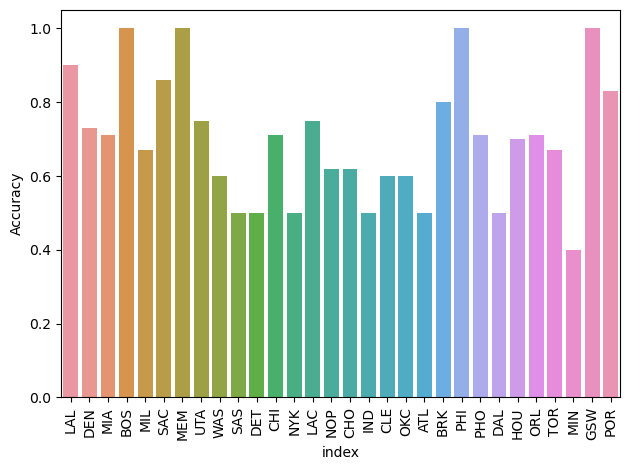

In [20]:
show_accuracy_teams(df_accuracy_teams)

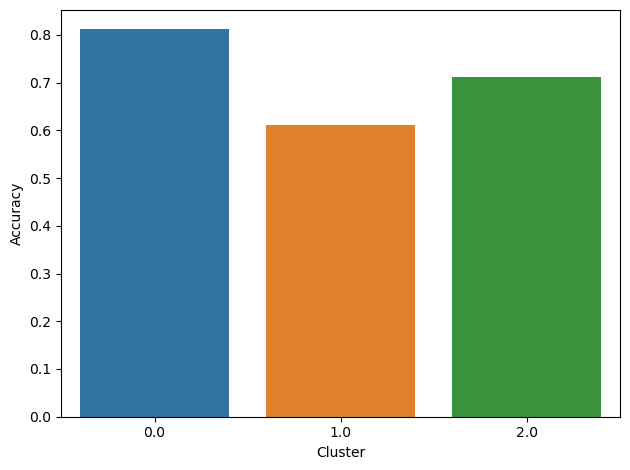

In [21]:
show_accuracy_clust(df_accuracy_teams)

Como podemos ver mi modelo tiene un mejor rendimiento con los equipos que pertenecen a Cluster 0, mientras que el peor rendimiento es con el Cluster 1.

De aquí podemos deducir el modelo puede estar sesgado por las variables de Jugador y de Anotación lo que hace que un Cluster como el Cluster 0 (juego en equipo y ofensivo) sea obtenido sus resultados con un mejor rendimiento que el Cluster 1 (juego interior y defensivo) ya que las estadísticas que contemplan este tipo de juego no están presentes como las de mayor importancia para este. 

In [22]:
df.to_csv('DataFrameForModel_0.2.csv', index=False)
df_pred_test.to_csv('Prediction-Result.csv', index=False)
df_accuracy_teams.to_csv('AccuracyTeams.csv')